In [25]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
# 10000, 1, 100
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
df = pd.read_csv("/content/bank-additional-full.csv",delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Column statistics**

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


**Kiểm tra giá trị null**

In [29]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [30]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [31]:
df.duplicated().sum()

12

In [32]:
df = df.drop_duplicates()

In [33]:
df.duplicated().sum()

0

<Axes: title={'center': 'Count of Class'}, xlabel='y', ylabel='count'>

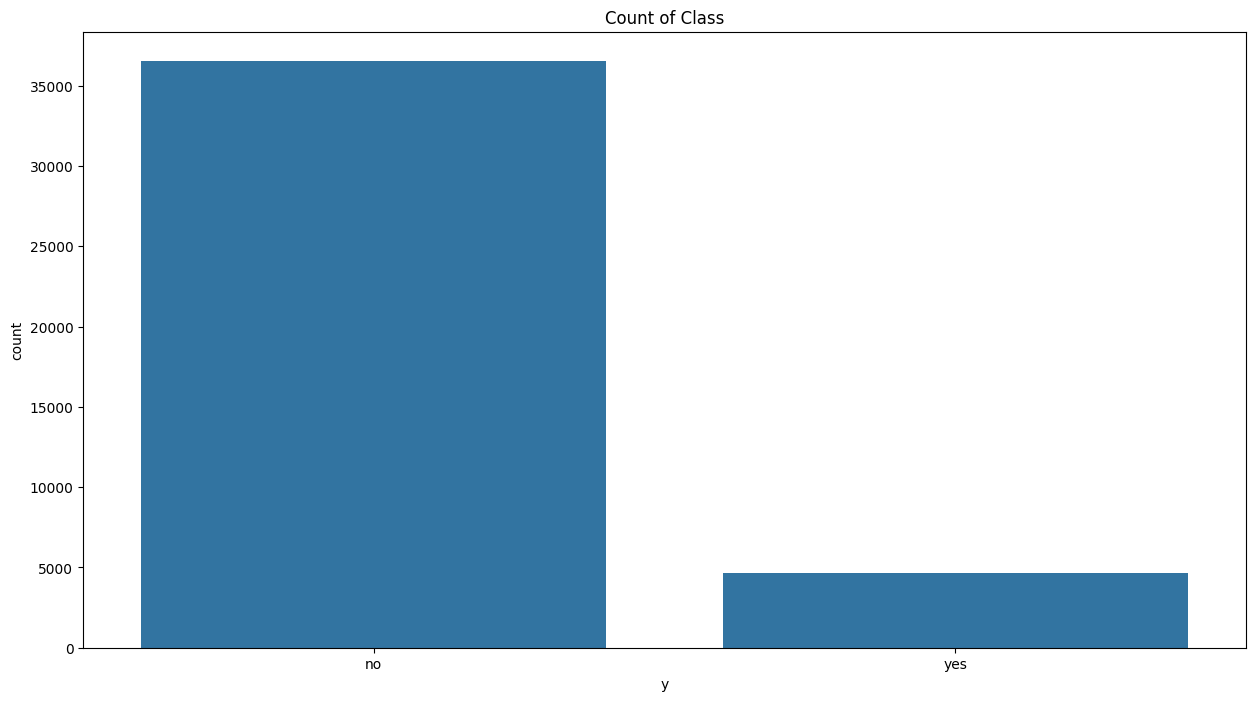

In [34]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='y')

In [35]:
corr_matrix = df.corr()
#ma trận tương quan

<ipython-input-35-4ce36f60a564>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [36]:
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


<Axes: >

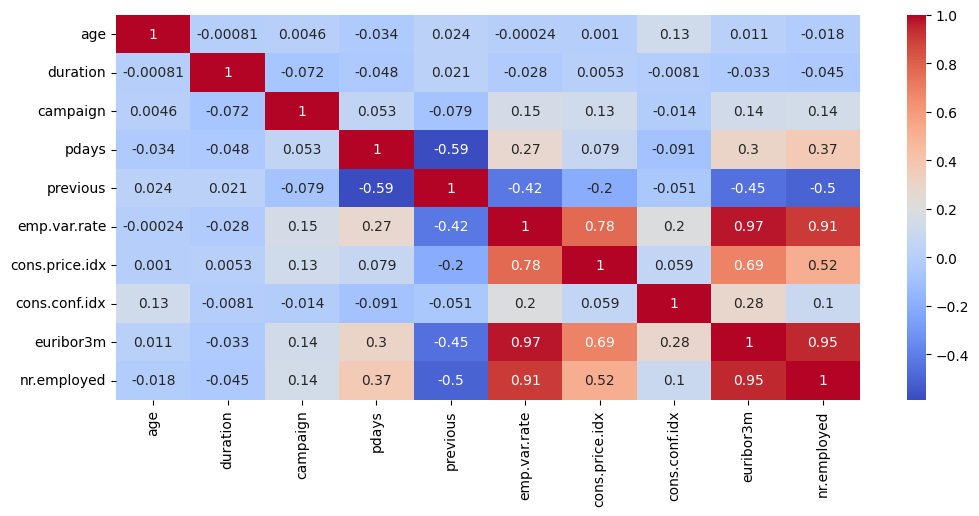

In [37]:
plt.figure(figsize = (12, 5))
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'coolwarm')

**Categorizing variables**

In [38]:
df['y']= df['y'].replace('yes',1)
df['y']= df['y'].replace('no',0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


**Categorical**

In [39]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
cat_col = [col for col in df.columns if df[col].dtype == 'object']

**Categorical variables**

In [40]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

**Numerical variables**

In [41]:
num_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

**Visualizing Data**

*Numerical data *

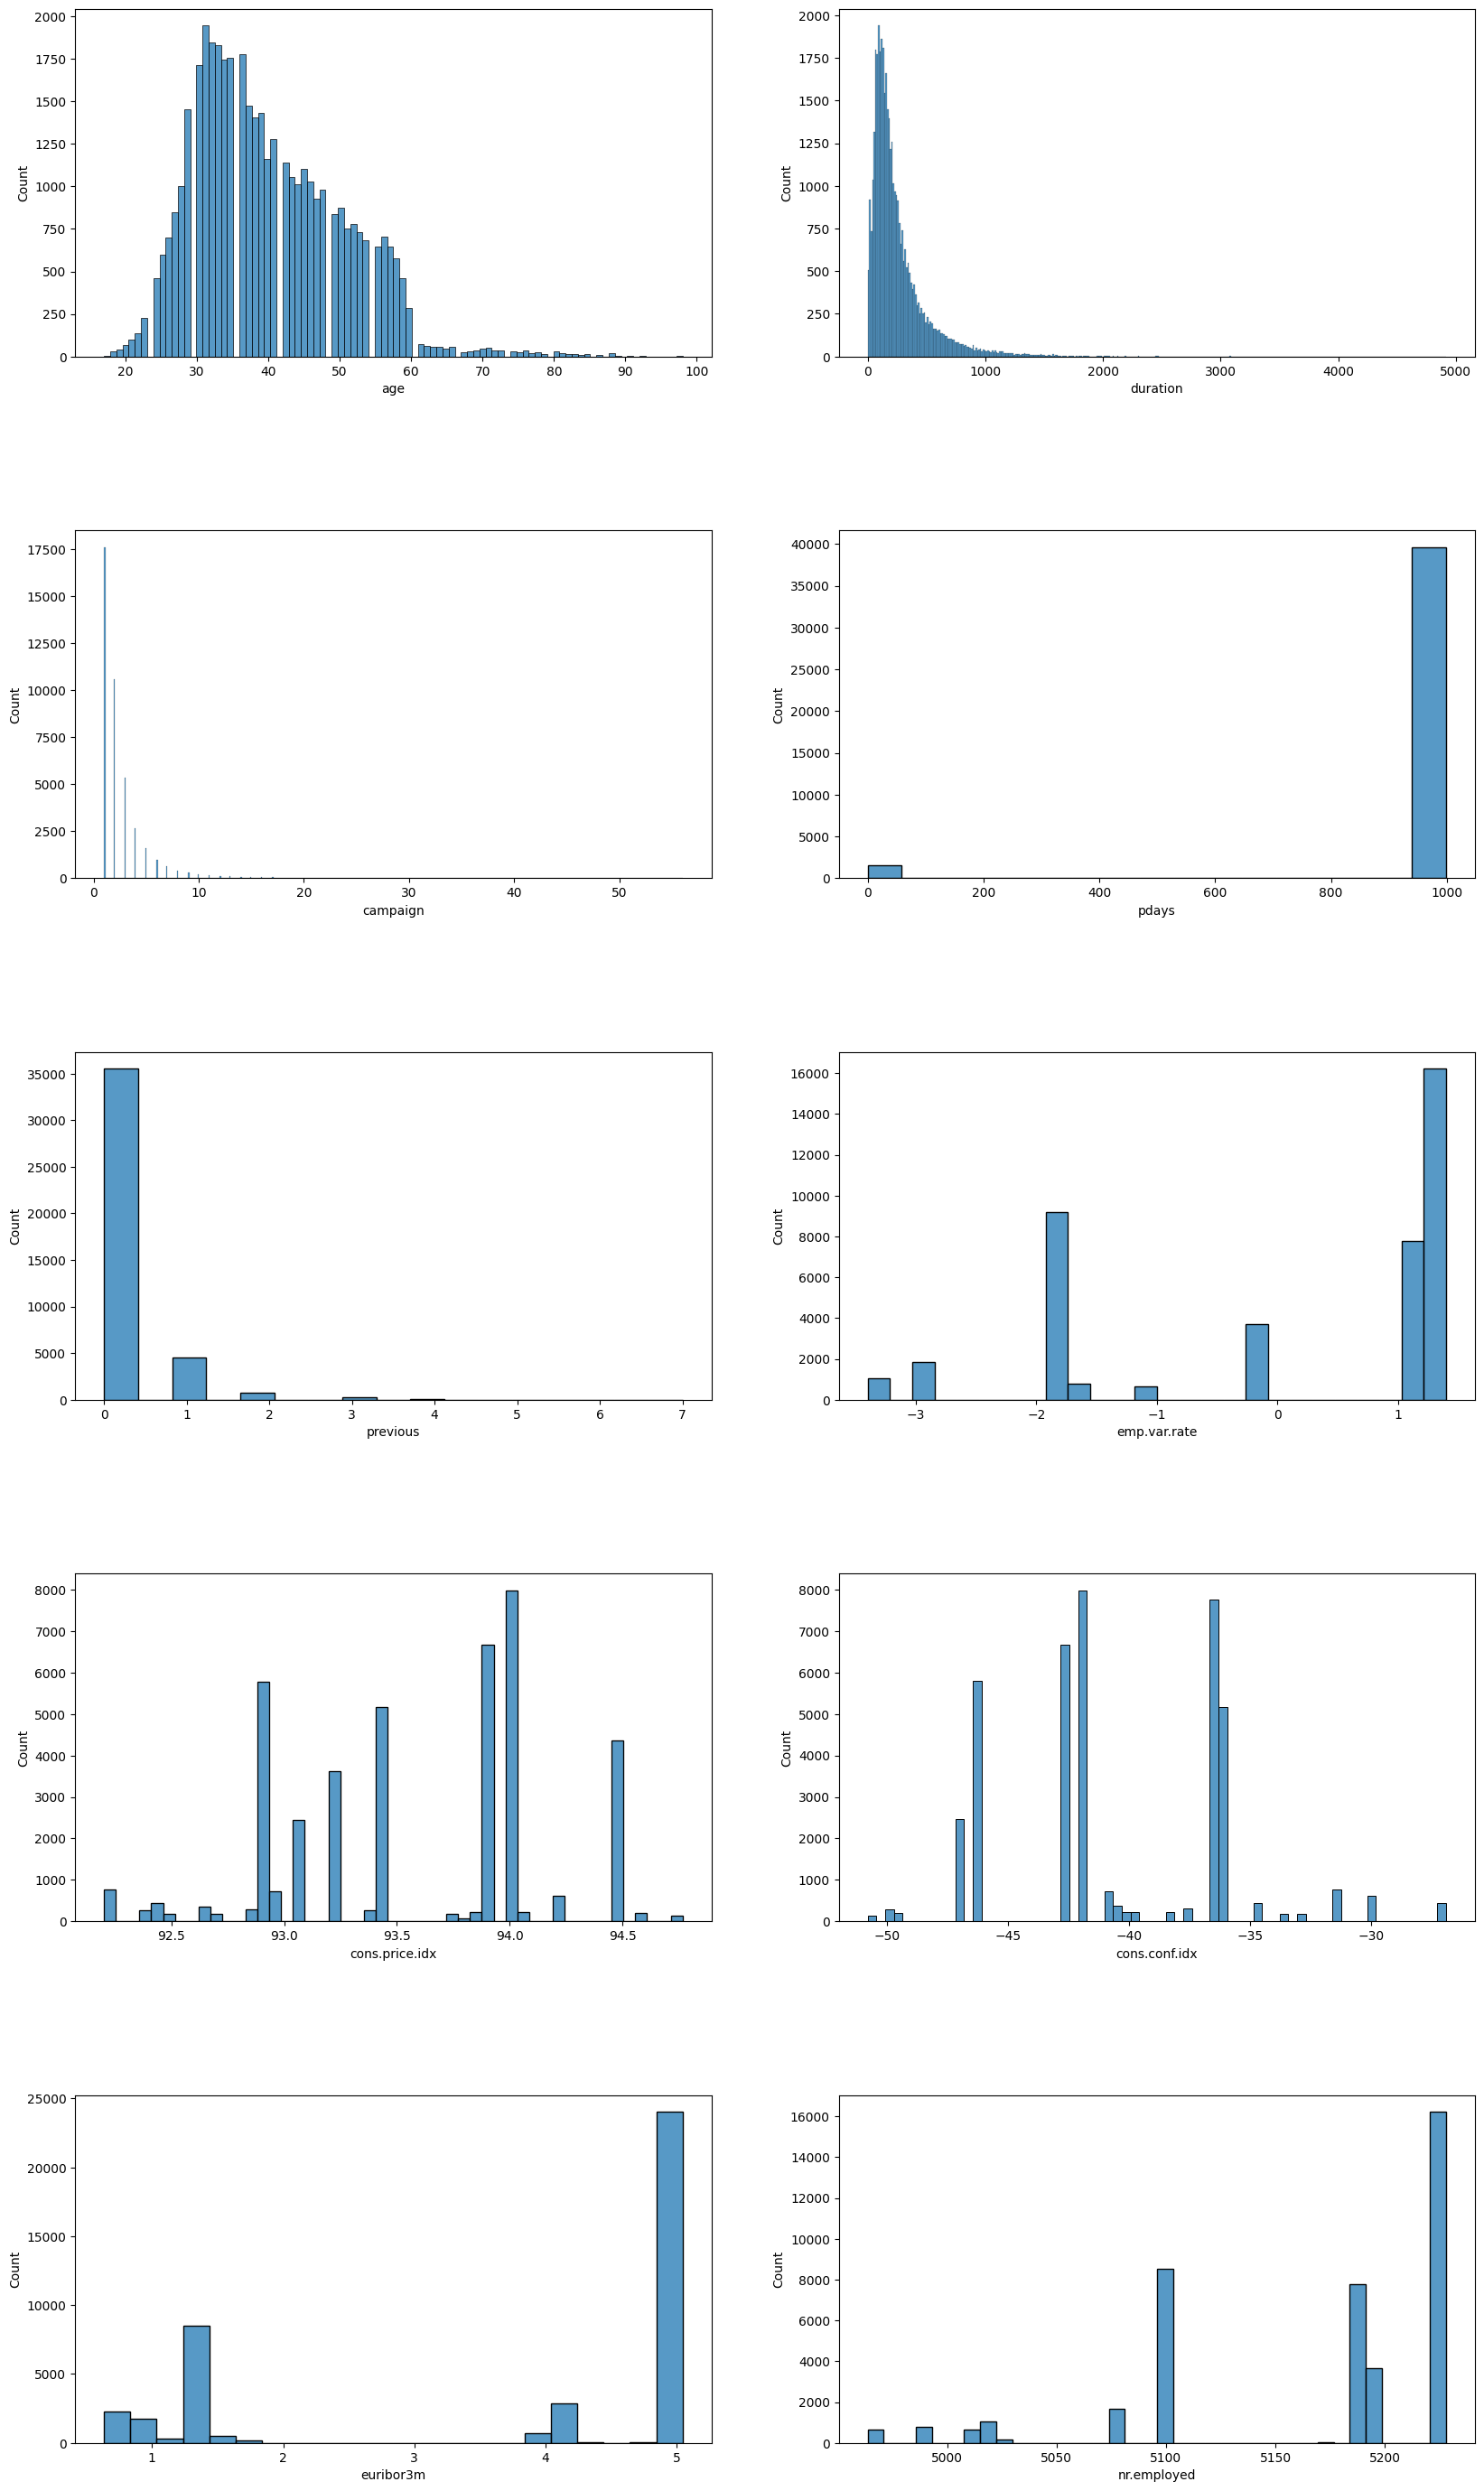

In [42]:
fig,axes = plt.subplots(5,2,figsize=(20,35))
for index,col in enumerate(num_col[:-1]):
  x,y = index//2,index%2
  sns.histplot(df[col],ax=axes[x,y])
plt.subplots_adjust(hspace=0.5)

*Categorical data *

<ipython-input-43-6bbdbc9a469b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
<ipython-input-43-6bbdbc9a469b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
<ipython-input-43-6bbdbc9a469b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
<ipython-input-43-6bbdbc9a469b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
<ipython-input-43-6bbdbc9a469b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
<ipython-input-43-6bbdbc9a469b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
<ipython-input-4

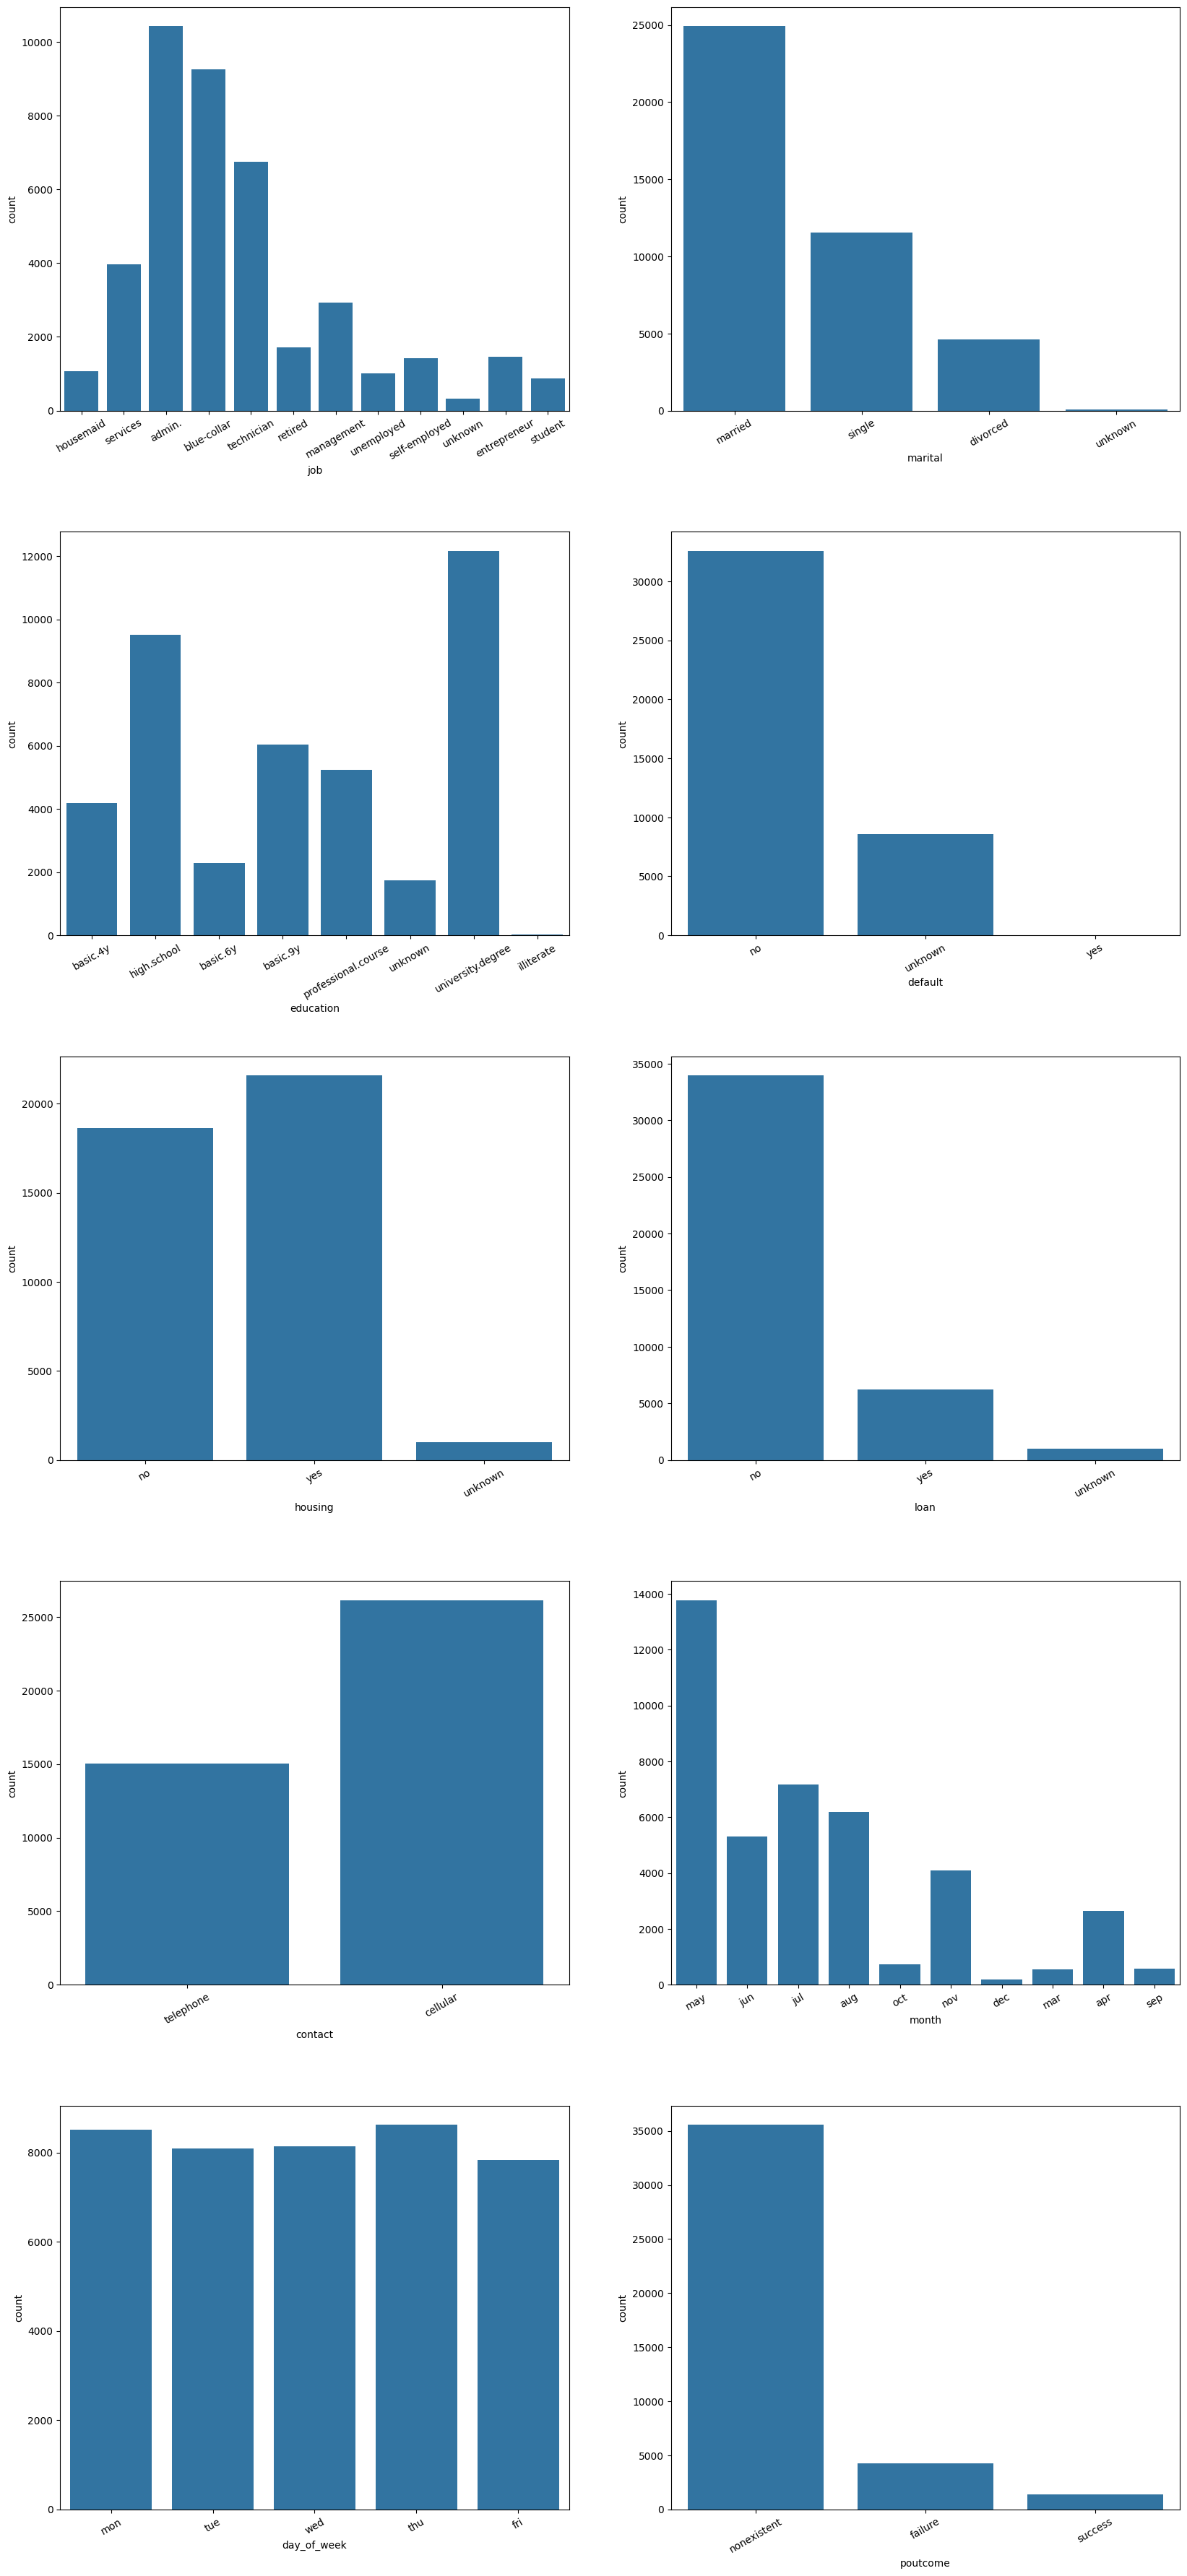

In [43]:
fig, axes = plt.subplots(5, 2, figsize=(20, 45))

for index, col in enumerate(cat_col):
    x, y = index // 2, index % 2
    g = sns.countplot(data=df, x=col, ax=axes[x, y])
    g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.subplots_adjust(hspace=0.3)


In [44]:
X = df.drop('y', axis=1)
y = df['y']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from imblearn.over_sampling import SMOTE

# Tiền xử lý dữ liệu chuỗi bằng One-Hot Encoding
X_encoded = pd.get_dummies(X)  # Áp dụng One-Hot Encoding cho tất cả các biến chuỗi trong X

# Khởi tạo đối tượng SMOTE
smote = SMOTE()

# Áp dụng SMOTE trên dữ liệu đã được mã hóa
X_sm, y_sm = smote.fit_resample(X_encoded, y)

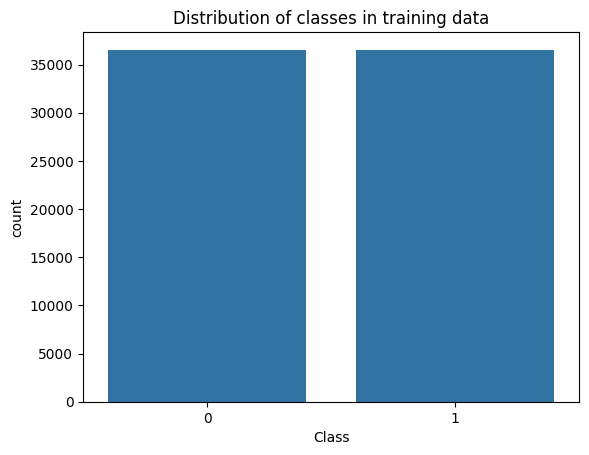

In [47]:
sns.countplot(x = y_sm)
plt.title("Distribution of classes in training data")
plt.xlabel("Class")
plt.show()
# cân bằng dữ liệu thì chia lại

**Modeling**

**descion tree**

In [89]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Áp dụng One-Hot Encoding cho tập huấn luyện và tập kiểm tra
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Đảm bảo rằng tập kiểm tra có cùng số lượng cột và cùng tên cột với tập huấn luyện
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Áp dụng SMOTE trên tập huấn luyện đã được mã hóa
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train_encoded, y_train)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện đã được mã hóa và cân bằng dữ liệu
dt_classifier.fit(X_train_sm, y_train_sm)

# Dự đoán trên tập kiểm tra đã được mã hóa
y_pred = dt_classifier.predict(X_test_encoded)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.717477535821258


độ chính xác của cây là 0.717477535821258

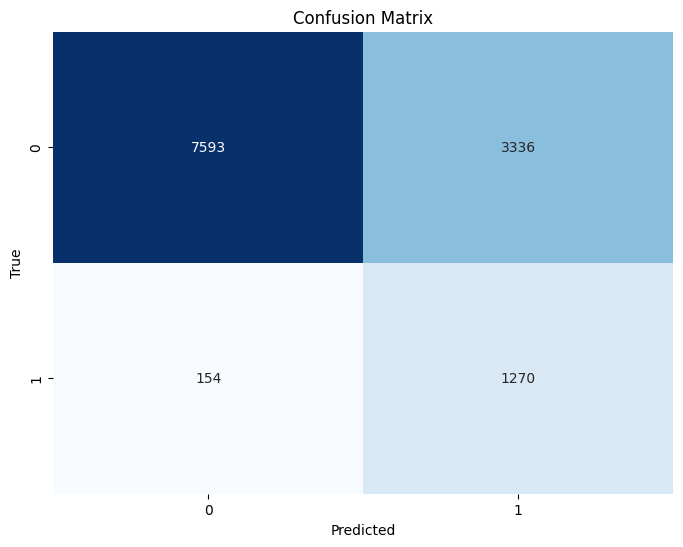

In [90]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

True Positive (số lượng các trường hợp dự đoán đúng là positive): là 7593

False Positive (số lượng các trường hợp dự đoán sai là positive): là 3336

False Negative (số lượng các trường hợp dự đoán sai là Negative): là 154

True Negative (số lượng các trường hợp dự đoán đúng là Negative): là 1270


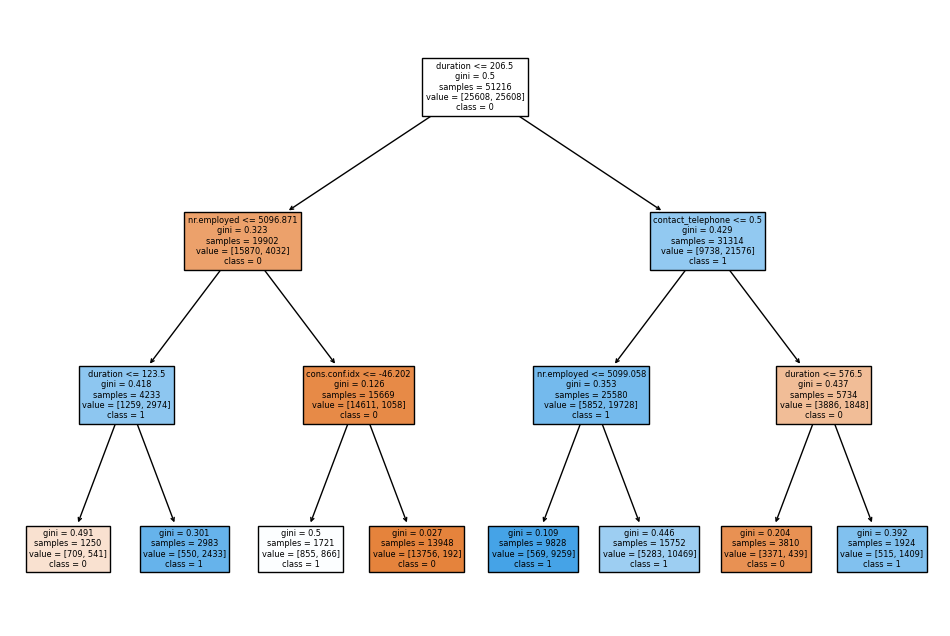

In [50]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X_train_encoded.columns, class_names=['0', '1'])
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Tiền xử lý dữ liệu chuỗi bằng One-Hot Encoding
X_encoded = pd.get_dummies(X)  # Áp dụng One-Hot Encoding cho tất cả các biến chuỗi trong X

# Áp dụng SMOTE cho dữ liệu đã được mã hóa
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Tách tập dữ liệu đã được cân bằng thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    # Print the accuracy for the current max_depth
    print(f"Max Depth = {max_depth}: Accuracy = {accuracy}")
    # Check if the current model has a better accuracy than the previous best
    if accuracy > best_score:
        best_score = accuracy
        best_max_depth = max_depth

# Print the best max depth and corresponding accuracy
print(f"Best Max Depth = {best_max_depth}: Best Accuracy = {best_score}")

Max Depth = 3: Accuracy = 0.8185011175477809
Max Depth = 4: Accuracy = 0.8676276057108973
Max Depth = 5: Accuracy = 0.891073302011586
Max Depth = 6: Accuracy = 0.9022031656251426
Max Depth = 7: Accuracy = 0.9115996898234731
Max Depth = 8: Accuracy = 0.9171190074351138
Max Depth = 9: Accuracy = 0.9242804360717055
Max Depth = 10: Accuracy = 0.9249190348036309
Max Depth = 11: Accuracy = 0.9263330748528942
Max Depth = 12: Accuracy = 0.9303927382201341
Max Depth = 13: Accuracy = 0.9322629202207727
Max Depth = 14: Accuracy = 0.9330839757332482
Max Depth = 15: Accuracy = 0.9334488892943484
Max Depth = 16: Accuracy = 0.9333120467089359
Max Depth = 17: Accuracy = 0.933585731879761
Max Depth = 18: Accuracy = 0.9334488892943484
Max Depth = 19: Accuracy = 0.9339050312457237
Best Max Depth = 19: Best Accuracy = 0.9339050312457237


vậy độ sâu tốt nhất của cây (Best Accuracy) là : 0.9339050312457237

In [52]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Tiền xử lý dữ liệu chuỗi bằng One-Hot Encoding
X_encoded = pd.get_dummies(X)  # Áp dụng One-Hot Encoding cho tất cả các biến chuỗi trong X

# Áp dụng SMOTE cho dữ liệu đã được mã hóa
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Khởi tạo và huấn luyện mô hình Decision Tree trên dữ liệu đã được cân bằng
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_sm, y_sm)

# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=X_encoded.columns.tolist())
print(tree_rules)


|--- duration <= 249.50
|   |--- nr.employed <= 5098.26
|   |   |--- duration <= 123.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- poutcome_success <= 0.50
|   |   |   |   |   |--- duration <= 64.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  64.50
|   |   |   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |   |   |--- cons.conf.idx <= -30.75
|   |   |   |   |   |   |   |   |--- housing_no <= 0.50
|   |   |   |   |   |   |   |   |   |--- housing_unknown <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- housing_unknown >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- housing_no >  0.50
|   |   |   |   |   |   |   |   |   |--- euribor3m <= 1.15
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- euribor3m >  1.15
|   |   |   |   |   |   |   |   |   |   |--- cons.price.idx <= 92.92
|   |   | 

**Đánh giá thuật toán Decision Tree:**

Ưu điểm:
-Mô hình sinh ra các quy tắc dễ hiểu cho người đọc, tạo ra bộ luật với mỗi nhánh lá là một luật của cây.

-Có khả năng là việc với dữ liệu lớn

-Có thể làm việc với cả dữ liệu số và dữ liệu phân loại

Nhược điểm :

-Mô hình cây quyết định phụ thuộc rất lớn vào dữ liệu của bạn. Thạm chí, với một sự thay đổi nhỏ trong bộ dữ liệu, cấu trúc mô hình cây quyết định có thể thay đổi hoàn toàn.

-Cây quyết định hay gặp vấn đề overfitting



**naives bayes**

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Tiền xử lý dữ liệu chuỗi bằng One-Hot Encoding
X_encoded = pd.get_dummies(X)  # Áp dụng One-Hot Encoding cho tất cả các biến chuỗi trong X

# Tách tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Áp dụng SMOTE cho tập huấn luyện để cân bằng dữ liệu
smote = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Khởi tạo và huấn luyện mô hình Naive Bayes trên dữ liệu đã được cân bằng
model = GaussianNB()
model.fit(X_train_balanced, y_train_balanced)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình Naive Bayes là: {accuracy}")

# In báo cáo đánh giá chi tiết
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình Naive Bayes là: 0.8327531773658221
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     10929
           1       0.34      0.48      0.40      1424

    accuracy                           0.83     12353
   macro avg       0.63      0.68      0.65     12353
weighted avg       0.86      0.83      0.84     12353



đô chính xác của navies bayes là 0.8327531773658221

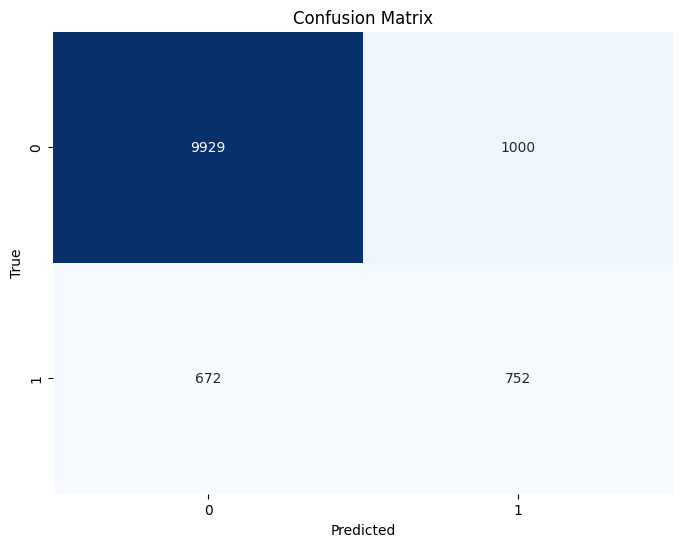

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# Khởi tạo và huấn luyện mô hình Gaussian Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Dự đoán kết quả
y_pred = naive_bayes.predict(X_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn bằng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

True Positive (số lượng các trường hợp dự đoán đúng là positive): là 9929

False Positive (số lượng các trường hợp dự đoán sai là positive): là 1000

False Negative (số lượng các trường hợp dự đoán sai là Negative): là 672

True Negative (số lượng các trường hợp dự đoán đúng là Negative): là 752

**đánh giá thuật toán navies bayes:**

Ưu điểm

-hoạt động tốt cho nhiều bài toán/miền sữ liệu và ứng dụng.

-Đơn giản nhưng đủ tốt để giải quyết nhiều bài toán như phân lớp văn bản, lọc spam,..

-Huấn luyện mô hình (ước lượng tham số) dễ và nhanh.

Nhược điểm

-Vấn đề zero

-Mô hình không được huẩn luyện bằng phượng pháp tối ưu mạnh và chặt chẽ.

-Tham số mủa mô hình là các ước lượng xác suất điều kiện đơn lẻ.




**Random forest**

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

X_encoded = pd.get_dummies(X)

# Áp dụng SMOTE cho dữ liệu để cân bằng
smote = SMOTE(sampling_strategy='minority')
X_balanced, y_balanced = smote.fit_resample(X_encoded, y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
rf.fit(X_train, y_train)

# Dự đoán nhãn cho tập dữ liệu test
predictions = rf.predict(X_test)
# Đánh giá độ chính xác và hiển thị báo cáo
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.9503717556903708
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11029
           1       0.96      0.94      0.95     10894

    accuracy                           0.95     21923
   macro avg       0.95      0.95      0.95     21923
weighted avg       0.95      0.95      0.95     21923



độ chính xác của Random forest là : 0.9110337569821096

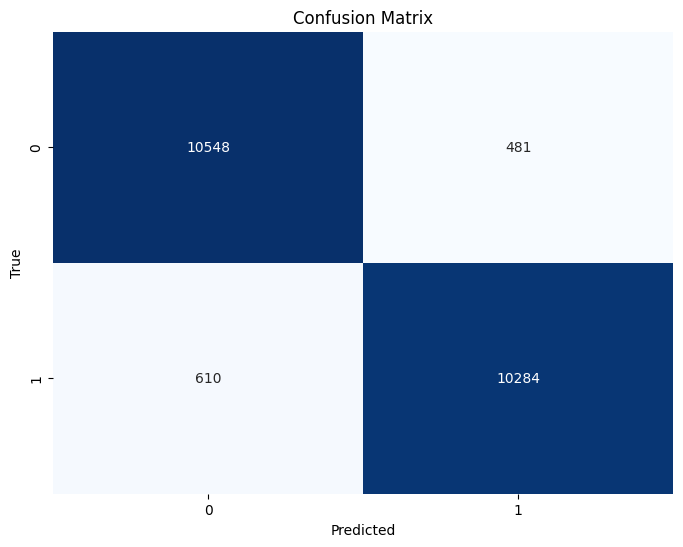

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier()

# Huấn luyện mô hình trên tập huấn luyện
rf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = rf.predict(X_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn bằng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

True Positive (số lượng các trường hợp dự đoán đúng là positive): là 10548

False Positive (số lượng các trường hợp dự đoán sai là positive): là 481

False Negative (số lượng các trường hợp dự đoán sai là Negative): là 610

True Negative (số lượng các trường hợp dự đoán đúng là Negative): là 10284

**Đánh giá thuật toán Random forest**

*Ưu điểm:

-Random Forest có khả năng thực hiện cả hai nhiệm vụ Phân loại và Hồi quy.

-Nó có khả năng xử lý các tập dữ liệu lớn với kích thước cao.

-Nó nâng cao độ chính xác của mô hình và ngăn chặn vấn đề trang bị quá mức.

*Nhược điểm:

-Overfitting: Nếu số lượng cây quản lí lùi trở lại quá lớn, Random Forest có thể overfit dữ liệu, làm cho nó không có khả năng dự đoán cho dữ liệu mới.

-Quá nhiều cây: Random Forest là một học máy kết hợp nhiều cây quản lí lùi trở lại, với một số cây trong quá trình học. Như vậy, nó có thể tốn nhiều tài nguyên và thời gian để xây dựng và quản lý một lớp cây.

-Memory usage: Random Forest có tầm nhìn rất lớn, do đó, nó có thể tiêu dung memory lớn khi xử lý dữ liệu. Nếu dữ liệu có kích thước lớn, Random Forest có thể gây ra lỗi do memory overflow.

-Interpretability: Do Random Forest là một học máy kết hợp ngẫu nhiên, không có cách rõ ràng để giải thíêt biến chính xác, vì nó sẽ chọn một số biến khác nhau từ mỗi cây.

-Sensitivity to missing values: Random Forest có khản cứng đối với dữ liệu bị thiếu, vì nó sẽ chọn một số cây khác nhau từ dữ liệu, và một số cây có thể bị ảnh hưởng nặng bởi dữ liệu bị thiếu.

**Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression # Thư viện LogisticRegression trong sklearn
from sklearn.metrics import classification_report   # classification_report: dánh giá mô hình

In [58]:
def log_reg(x_train,y_train,x_test,y_test):
  model = LogisticRegression()                  # Gán LogisticRegression cho 1 biến model

  model.fit(x_train,y_train)                    # Tính toán dữ liệu

  acc = model.score(x_test,y_test)              # Xem tập dữ liệu test có độ chính xác bao nhiêu %
  print("Độ chính xác",acc,"\n")

  y_pred = model.predict(x_test)                # predict : du doan
  print("Dự đoán",y_pred[:5],"\n")

  cl_rep = classification_report(y_test,y_pred) # Kết quả sẽ được lưu trong biến `cl_rep`
  print(cl_rep)

In [59]:
log_reg(X_train,y_train,X_test,y_test)

Độ chính xác 0.9076337731725087 

Dự đoán [1 0 0 0 0] 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10929
           1       0.67      0.40      0.50      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.69      0.72     12353
weighted avg       0.90      0.91      0.90     12353



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Độ chính xác của thuật toán Logistic Regression là :0.9076337731725087

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


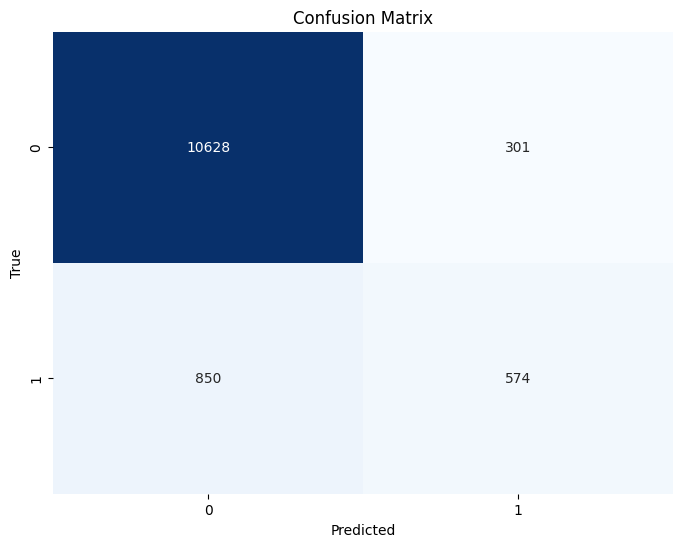

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Huấn luyện mô hình trên toàn bộ dữ liệu
logreg.fit(X, y)

# Dự đoán nhãn cho tập kiểm tra
y_pred = logreg.predict(X_test)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn bằng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

True Positive (số lượng các trường hợp dự đoán đúng là positive): là 10628

False Positive (số lượng các trường hợp dự đoán sai là positive): là 301

False Negative (số lượng các trường hợp dự đoán sai là Negative): là 850

True Negative (số lượng các trường hợp dự đoán đúng là Negative): là 574

**Đánh giá thuật toán Logistic Regression**

Ưu điểm:

-Dễ hiểu và dễ triển khai: Logistic Regression là một mô hình đơn giản và dễ hiểu, có thể được triển khai một cách nhanh chóng.

-Hiệu suất tốt với dữ liệu tuyến tính hóa: Khi dữ liệu tuyến tính hóa (linearly separable), Logistic Regression có thể cho kết quả tốt.

-Cung cấp xác suất dự đoán: Logistic Regression có thể cung cấp xác suất dự đoán thuộc vào mỗi lớp, chứ không chỉ là việc dự đoán lớp.

-Không yêu cầu dữ liệu lớn: Thuật toán có thể hoạt động tốt với các tập dữ liệu nhỏ hoặc có ít đặc trưng.

-Khả năng tùy chỉnh ngưỡng quyết định: Bằng cách thay đổi ngưỡng xác suất, người dùng có thể điều chỉnh giữa độ chính xác và độ nhạy cảm của mô hình.

Nhược điểm:

-Yêu cầu các điều kiện giả định: Logistic Regression yêu cầu dữ liệu phải thỏa mãn một số điều kiện giả định như tuyến tính hóa, không có nhiễu lớn, và không có đa cộng tuyến nghiêm trọng.

-Không xử lý được tương quan cao: Nếu có tương quan cao giữa các đặc trưng, Logistic Regression có thể không hoạt động hiệu quả.

-Không phù hợp với dữ liệu phi tuyến tính: Trong trường hợp dữ liệu không thể tuyến tính hóa, Logistic Regression có thể không cung cấp kết quả tốt.

-Dễ bị ảnh hưởng bởi outliers: Các điểm dữ liệu ngoại lai (outliers) có thể ảnh hưởng đáng kể đến mô hình Logistic Regression.